In [30]:
# import libraries
from eodag import EODataAccessGateway
from eodag.plugins.crunch.filter_property import FilterProperty
import fiona
import geopandas as gpd
import matplotlib.pyplot as plt

### Load Tiles outlines

In [100]:
# load tile outlines
outline = gpd.read_file("qgis_files/sen2_tiles/tiles_outline.shp")
bretagne = gpd.read_file("qgis_files/admin/bretagne.gpkg")
query_outline = gpd.read_file("qgis_files/admin/query_outline.shp")

# simplify geometry
#bretagne["geometry"] = bretagne["geometry"].simplify(0.0001)
bretagne_wkt = bretagne.geometry.to_wkt()[0]

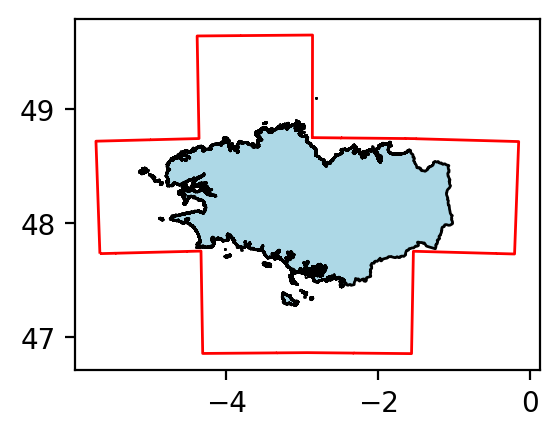

In [101]:
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
fig, ax = plt.subplots(1, 1,figsize=(3,3), dpi=200)

bretagne.plot(ax=ax,color='lightblue', edgecolor='black')
outline.plot(ax=ax,facecolor="none",edgecolor="red",markersize=0.2)
fig.show()

In [102]:
# API core acess gateway
dag = EODataAccessGateway()

In [103]:
len(bretagne_wkt)

2863945

In [91]:
# Query for images
search_results, total_count = dag.search(
    productType='S2_MSI_L2A',
    #geom={'lonmin': 1, 'latmin': 43.5, 'lonmax': 2, 'latmax': 44}, # accepts WKT polygons, shapely.geometry, ...
    geom=bretagne_wkt,
    start='2018-04-01',
    end='2018-09-30'
)

Failed to reduce WKT length lower than 1600
Skipping error while counting results for peps QueryStringSearch instance: 
Traceback (most recent call last):
  File "/anaconda/lib/python3.7/site-packages/eodag/plugins/search/qssearch.py", line 716, in _request
    response.raise_for_status()
  File "/anaconda/lib/python3.7/site-packages/requests/models.py", line 940, in raise_for_status
    raise HTTPError(http_error_msg, response=self)
requests.exceptions.HTTPError: 403 Client Error: Forbidden for url: https://peps.cnes.fr/resto/api/collections/S2ST/search.json?startDate=2018-04-01&completionDate=2018-09-30&geometry=MULTIPOLYGON%20(((-3.2510%2047.3118,%20-3.2485%2047.3112,%20-3.2465%2047.3099,%20-3.2501%2047.3099,%20-3.2510%2047.3118)),%20((-2.8351%2047.3268,%20-2.8346%2047.3254,%20-2.8349%2047.3237,%20-2.8374%2047.3257,%20-2.8351%2047.3268)),%20((-2.8646%2047.3490,%20-2.8765%2047.3307,%20-2.8924%2047.3376,%20-2.8912%2047.3471,%20-2.8646%2047.3490)),%20((-2.9657%2047.3563,%20-2.9651%2047

In [22]:
# filter images by Cloud Cover
filtered_products = search_results.crunch(FilterProperty({"cloudCover": 10, "operator": "lt"}))
